In [ ]:
# import libraries and Load dataset
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_DIR = Path.cwd().parent
RAW_PATH = BASE_DIR / "data" / "raw" / "kickstarter_30k.csv"
REPORT_DIR = BASE_DIR / "reports" / "raw_eda"

REPORT_DIR.mkdir(parents=True, exist_ok=True)


Data Overview

In [2]:
df = pd.read_csv(RAW_PATH)

print("Shape:", df.shape)
df.head()


Shape: (30000, 16)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,target
0,838102090,NautiCloud,Technology,Technology,USD,2012-03-06,100000.0,2012-01-06 20:48:16,1367.00,failed,8,US,1367.00,1367.00,100000.00,0
1,517516345,FM Radio & 2015 Tour,R&B,Music,USD,2015-02-28,2500.0,2015-01-24 02:00:15,0.00,failed,0,US,0.00,0.00,2500.00,0
2,1409505461,Old Virginia Smoke Competition Barbecue and Ca...,Food,Food,USD,2014-02-13,5000.0,2013-12-16 15:12:04,5187.00,successful,48,US,5187.00,5187.00,5000.00,1
3,1078364175,The Sock Lab: Ultimate Everyday Socks,Fashion,Fashion,GBP,2017-10-19,4000.0,2017-09-04 08:46:05,5906.69,successful,194,GB,2584.76,7788.77,5274.54,1
4,2086349711,Revealing the real Rhett Butler,Documentary,Film & Video,USD,2011-06-28,20000.0,2011-05-29 21:28:51,319.00,failed,8,US,319.00,319.00,20000.00,0


In [3]:
# Display first few rows
print("First 5 rows:")
df.head()
# Dataset information
print("\nDataset Info:")
df.info()
# Statistical summary
print("\nStatistical Summary:")
df.describe()


First 5 rows:

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                30000 non-null  int64  
 1   name              29999 non-null  object 
 2   category          30000 non-null  object 
 3   main_category     30000 non-null  object 
 4   currency          30000 non-null  object 
 5   deadline          30000 non-null  object 
 6   goal              30000 non-null  float64
 7   launched          30000 non-null  object 
 8   pledged           30000 non-null  float64
 9   state             30000 non-null  object 
 10  backers           30000 non-null  int64  
 11  country           30000 non-null  object 
 12  usd pledged       29975 non-null  float64
 13  usd_pledged_real  30000 non-null  float64
 14  usd_goal_real     30000 non-null  float64
 15  target            30000 non-null  int64  
dtypes: float64(

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,target
count,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,2.997500e+04,3.000000e+04,3.000000e+04,30000.000000
mean,1.069728e+09,4.040794e+04,1.069887e+04,121.569667,7.567490e+03,9.818124e+03,3.872684e+04,0.403867
std,6.167369e+08,1.052307e+06,1.211037e+05,1784.979885,1.016549e+05,1.152577e+05,1.050600e+06,0.490680
min,2.137100e+04,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.800000e-01,0.000000
25%,5.331998e+08,2.000000e+03,5.000000e+01,2.000000,2.500000e+01,4.800000e+01,2.000000e+03,0.000000
50%,1.065408e+09,5.000000e+03,7.850000e+02,15.000000,5.020000e+02,7.910000e+02,5.000000e+03,0.000000
75%,1.606697e+09,1.500000e+04,4.598250e+03,63.000000,3.375000e+03,4.523500e+03,1.500000e+04,1.000000
max,2.147460e+09,1.000000e+08,1.328523e+07,219382.000000,1.328523e+07,1.328523e+07,1.000000e+08,1.000000


1. Missing Values Analysis


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

total_missing = missing_values.sum()
print(f"\nTotal missing values: {total_missing}")


Missing values per column:
ID                   0
name                 1
category             0
main_category        0
currency             0
deadline             0
goal                 0
launched             0
pledged              0
state                0
backers              0
country              0
usd pledged         25
usd_pledged_real     0
usd_goal_real        0
target               0
dtype: int64

Total missing values: 26


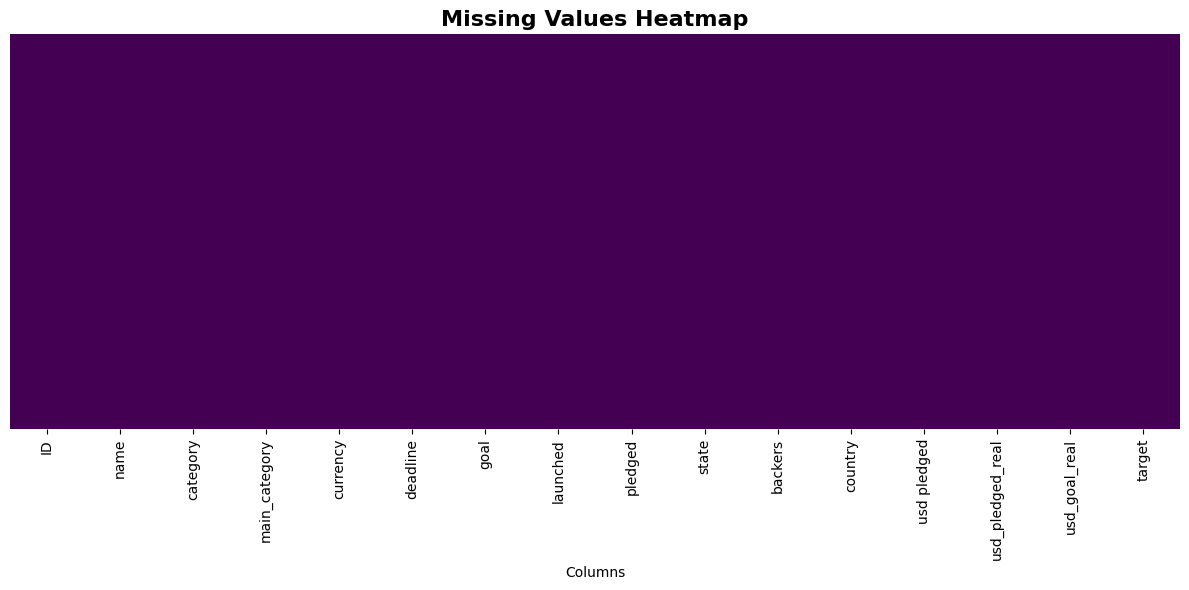


Observation:
⚠️ Found 26 missing values that need attention.


In [ ]:
#HeatMap

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=16, fontweight='bold')
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

print("\nObservation:")
if total_missing == 0:
    print(" No missing values are present in the cleaned dataset.")
else:
    print(f"Found {total_missing} missing values that need attention.")


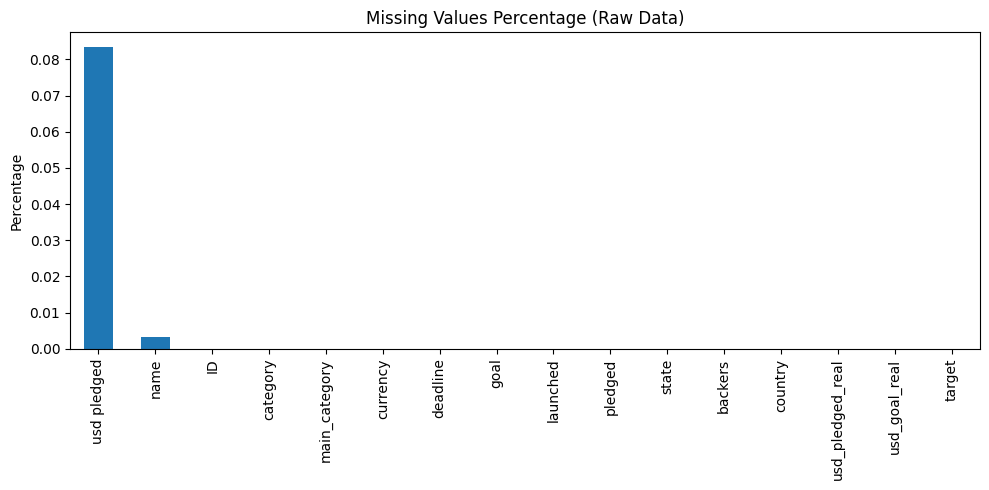

In [6]:
missing_percent = df.isnull().mean() * 100

plt.figure(figsize=(10,5))
missing_percent.sort_values(ascending=False).plot(kind="bar")
plt.title("Missing Values Percentage (Raw Data)")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()


In [7]:
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)


Duplicate rows: 0


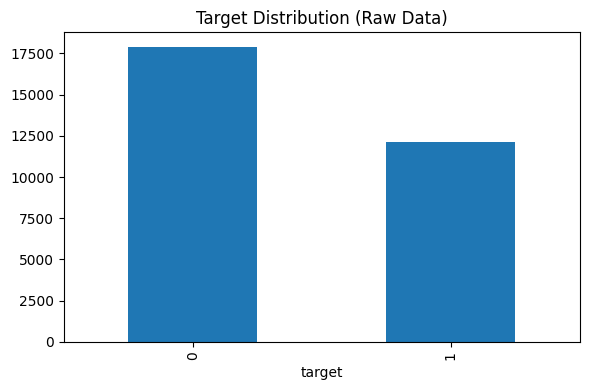

In [8]:
if "target" in df.columns:
    plt.figure(figsize=(6,4))
    df["target"].value_counts().plot(kind="bar")
    plt.title("Target Distribution (Raw Data)")
    plt.tight_layout()
    plt.savefig(REPORT_DIR / "target_distribution_raw.png")
    plt.show()


Outliers Cap

In [9]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    
    print(f"{col} → Outliers: {outliers}")


ID → Outliers: 0
goal → Outliers: 3668
pledged → Outliers: 3842
backers → Outliers: 3481
usd pledged → Outliers: 4036
usd_pledged_real → Outliers: 3828
usd_goal_real → Outliers: 3523
target → Outliers: 0


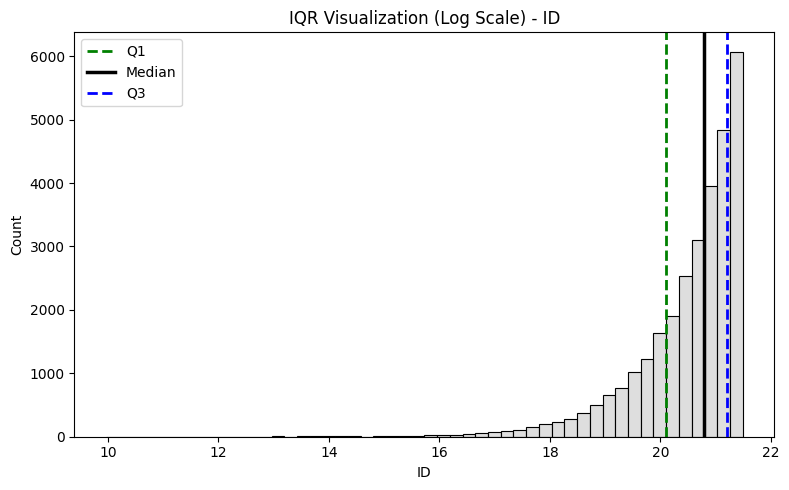

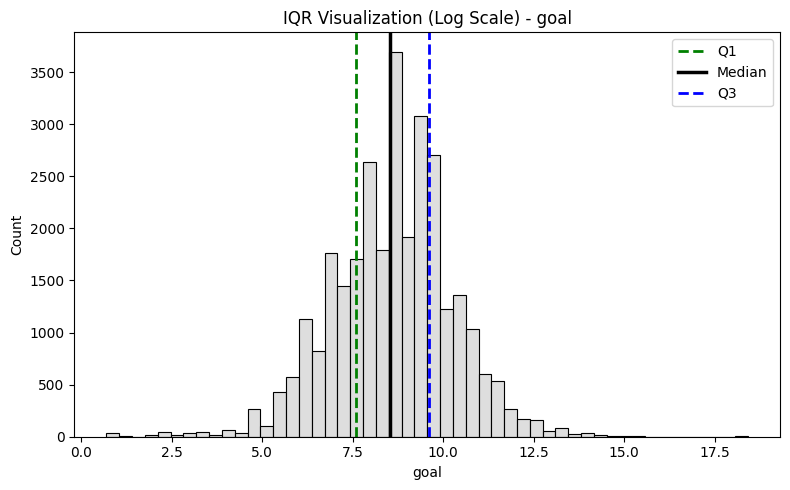

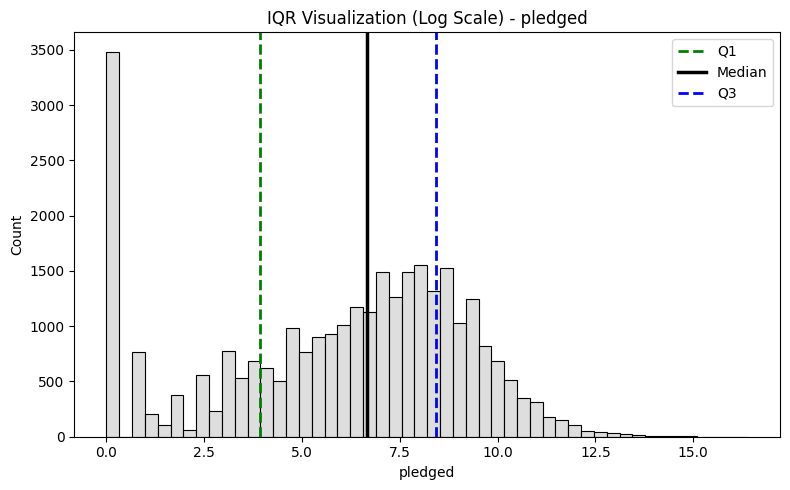

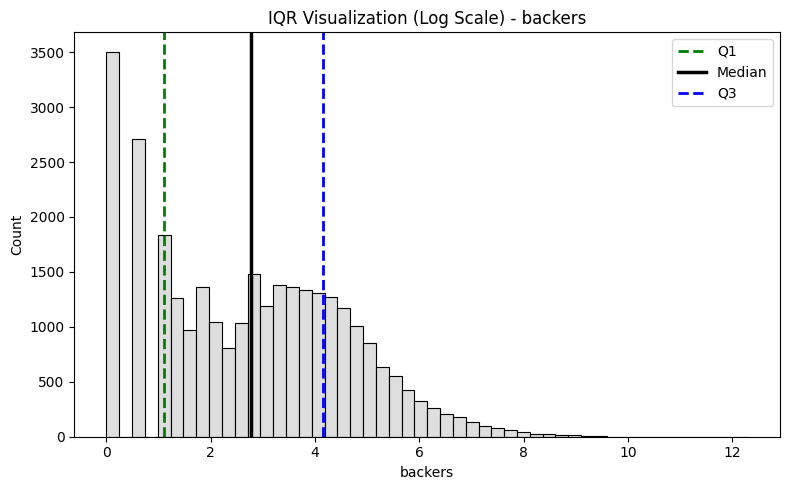

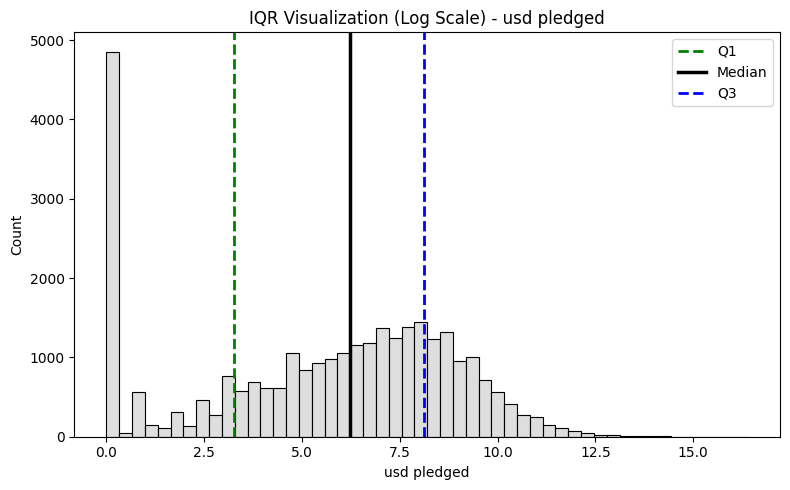

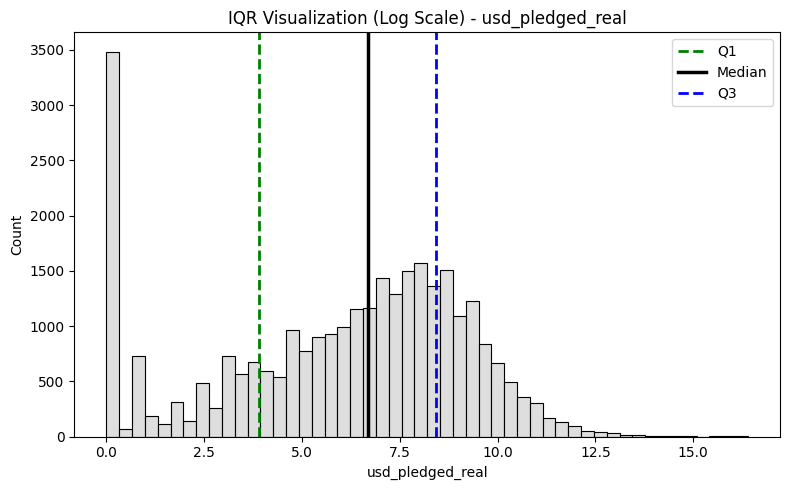

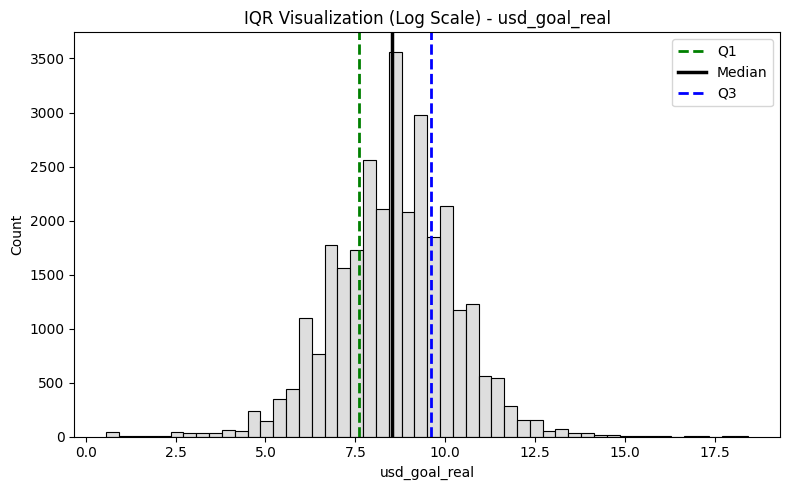

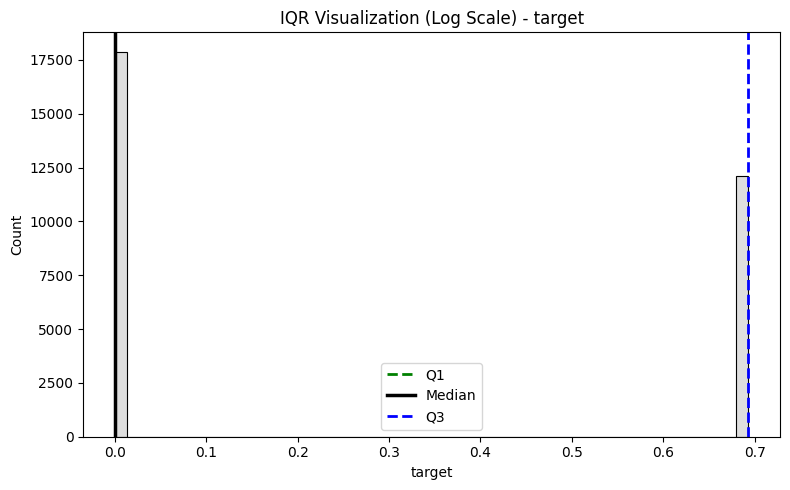

In [24]:
import numpy as np
for col in numeric_cols:
    Q1 = np.log1p(df[col]).quantile(0.25)
    Median = np.log1p(df[col]).quantile(0.50)
    Q3 = np.log1p(df[col]).quantile(0.75)

    plt.figure(figsize=(8,5))

    log_values = np.log1p(df[col])
    sns.histplot(log_values, bins=50, kde=False, color="lightgray")

    plt.axvline(Q1, color='green', linestyle='--', linewidth=2, label='Q1')
    plt.axvline(Median, color='black', linestyle='-', linewidth=2.5, label='Median')
    plt.axvline(Q3, color='blue', linestyle='--', linewidth=2, label='Q3')

    plt.title(f"IQR Visualization (Log Scale) - {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()




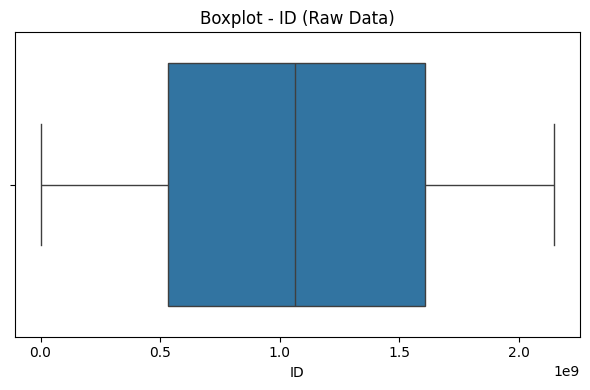

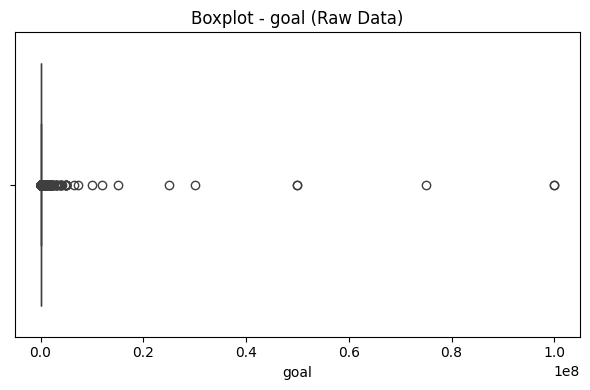

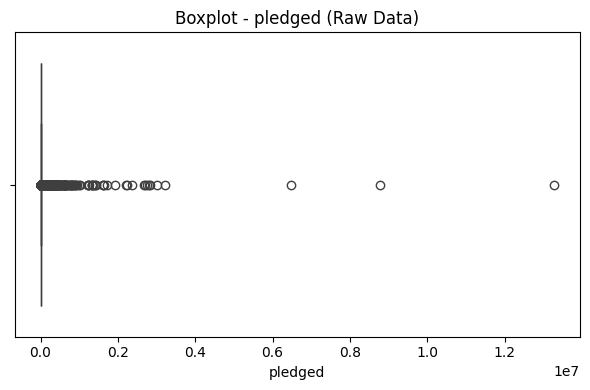

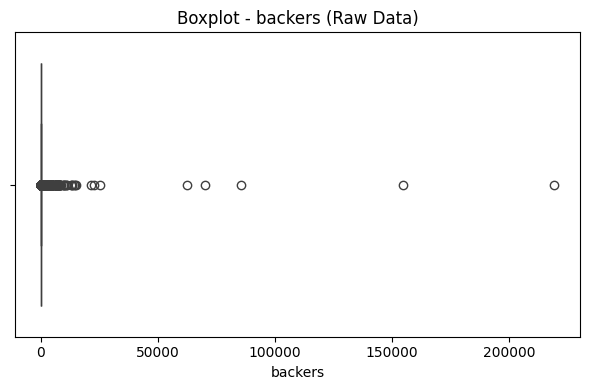

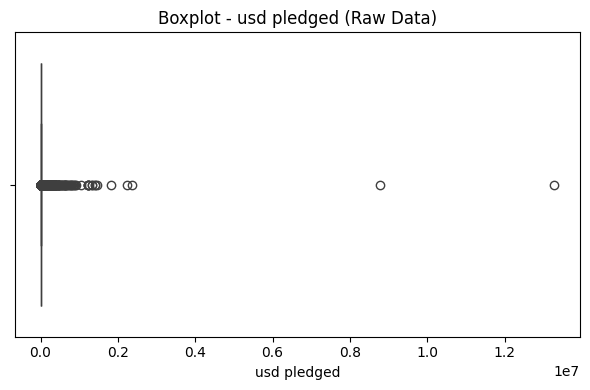

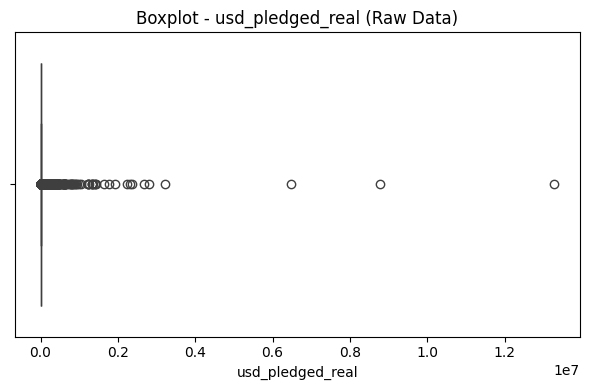

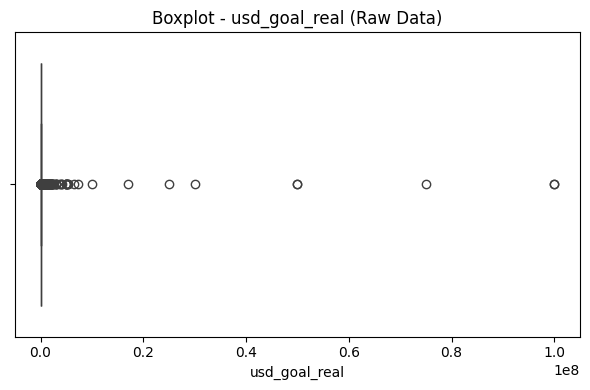

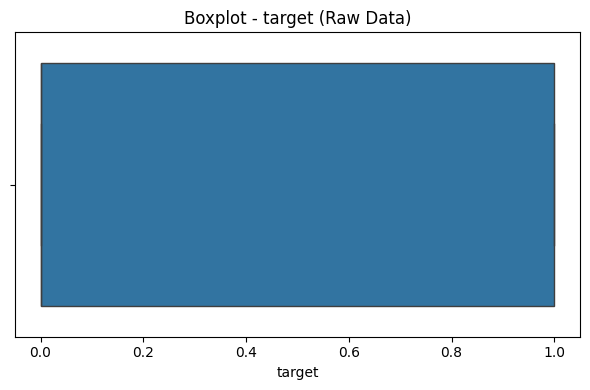

In [10]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col} (Raw Data)")
    plt.tight_layout()
    plt.savefig(REPORT_DIR / f"boxplot_{col}_raw.png")
    plt.show()


Correlation Matrix

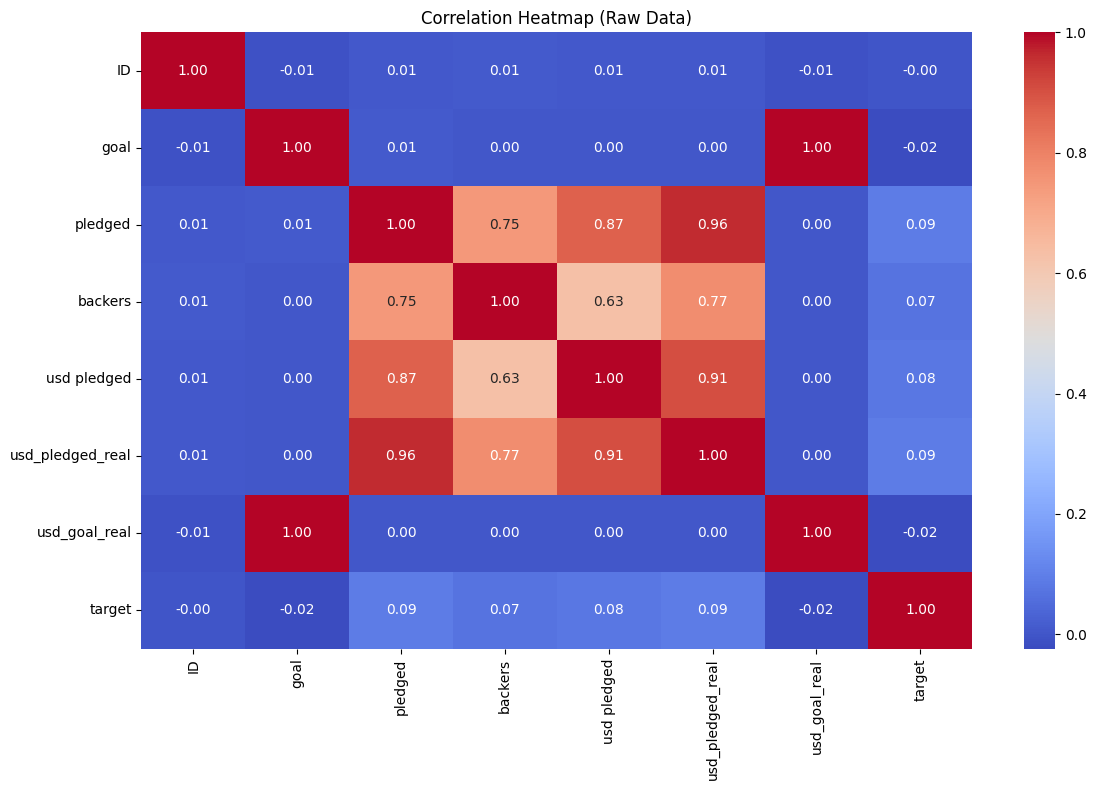

In [11]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Raw Data)")
plt.tight_layout()
plt.savefig(REPORT_DIR / "correlation_heatmap_raw.png")
plt.show()


Feature Distribution

Log Distribution

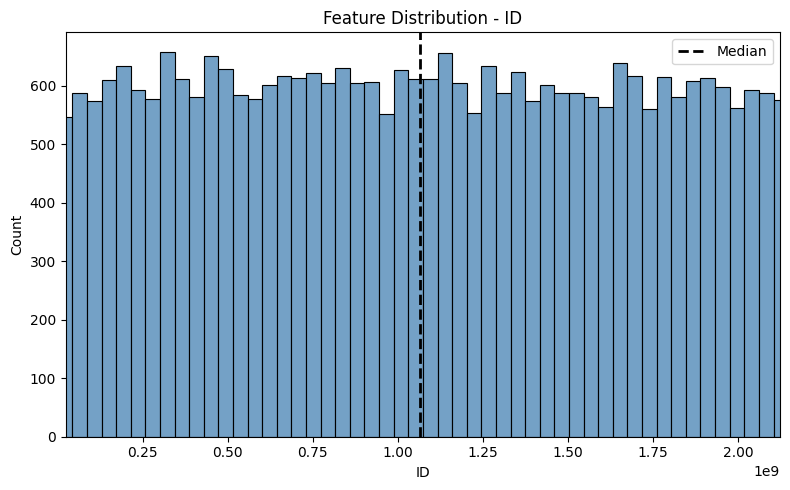

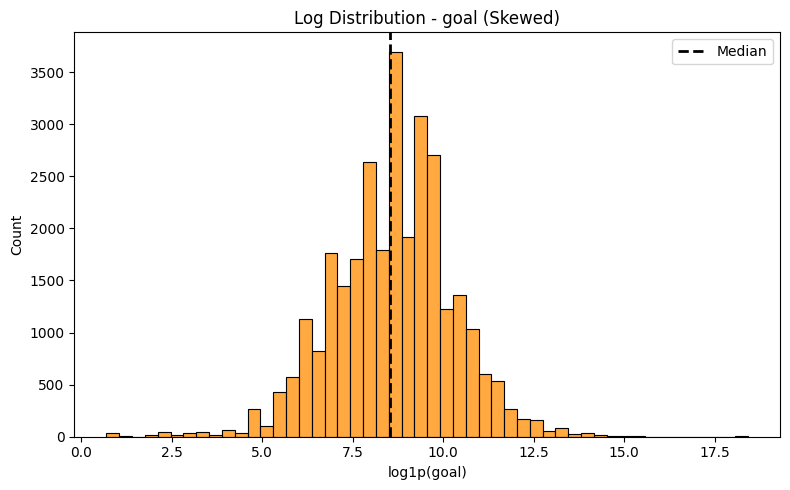

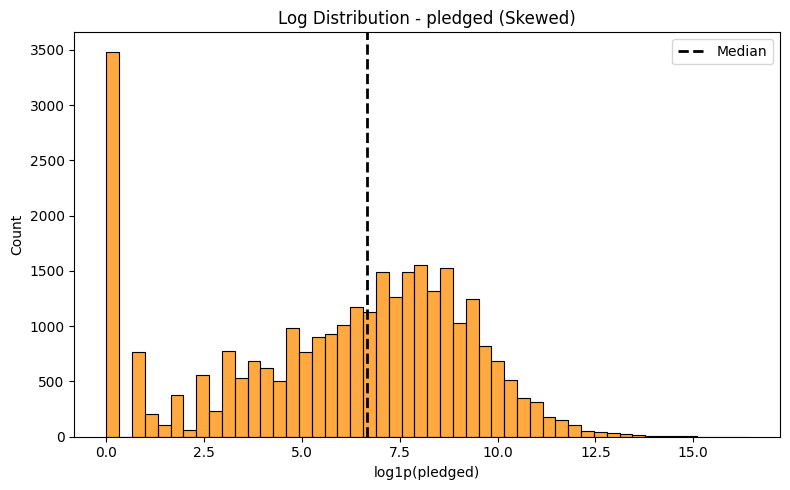

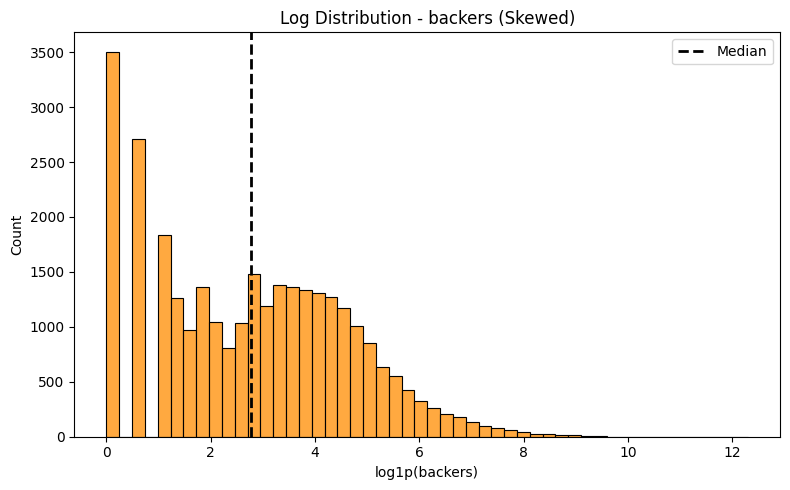

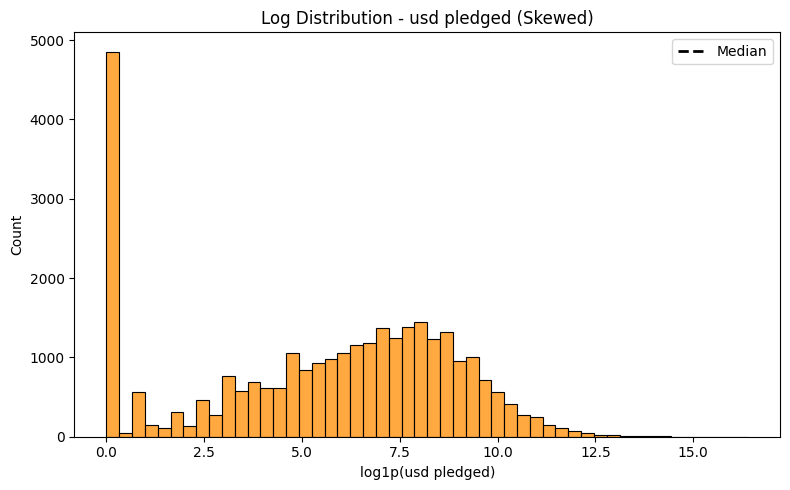

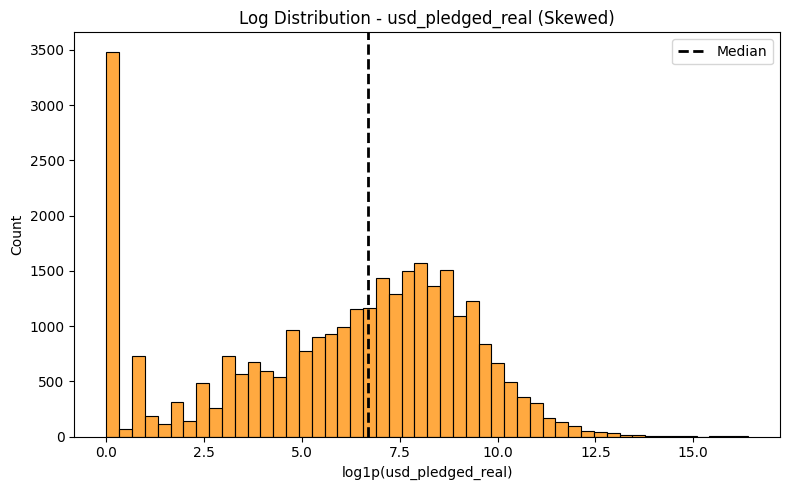

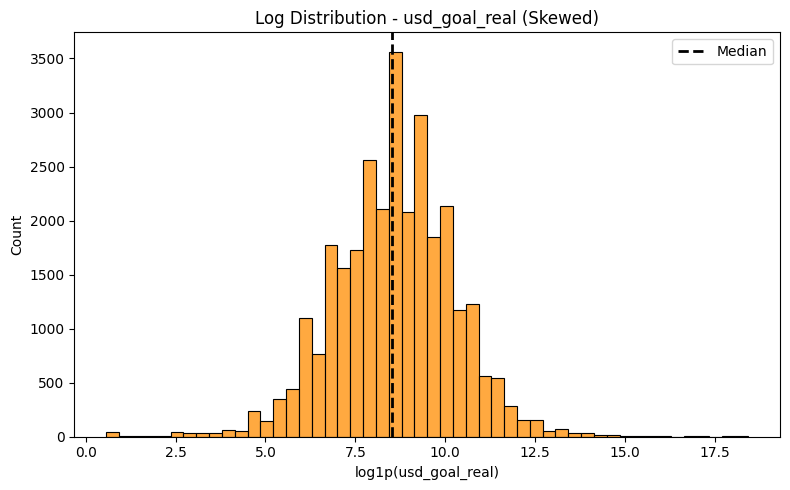

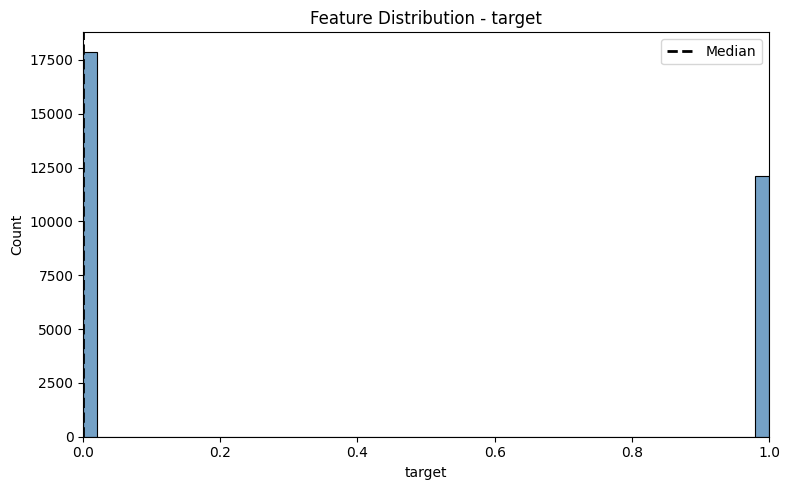

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:

    skewness = df[col].skew()

    plt.figure(figsize=(8,5))

    # If highly skewed → use log transform
    if skewness > 1:
        values = np.log1p(df[col])
        sns.histplot(values, bins=50, kde=False, color="darkorange")
        plt.title(f"Log Distribution - {col} (Skewed)")
        plt.xlabel(f"log1p({col})")
        median_value = np.median(values)
    else:
        # Normal scale but zoom to avoid extreme stretching
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)

        sns.histplot(df[col], bins=50, kde=False, color="steelblue")
        plt.xlim(lower, upper)
        plt.title(f"Feature Distribution - {col}")
        plt.xlabel(col)
        median_value = df[col].median()

    # Median line
    plt.axvline(median_value, color="black", linestyle="--", linewidth=2, label="Median")

    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()


Category Distribution

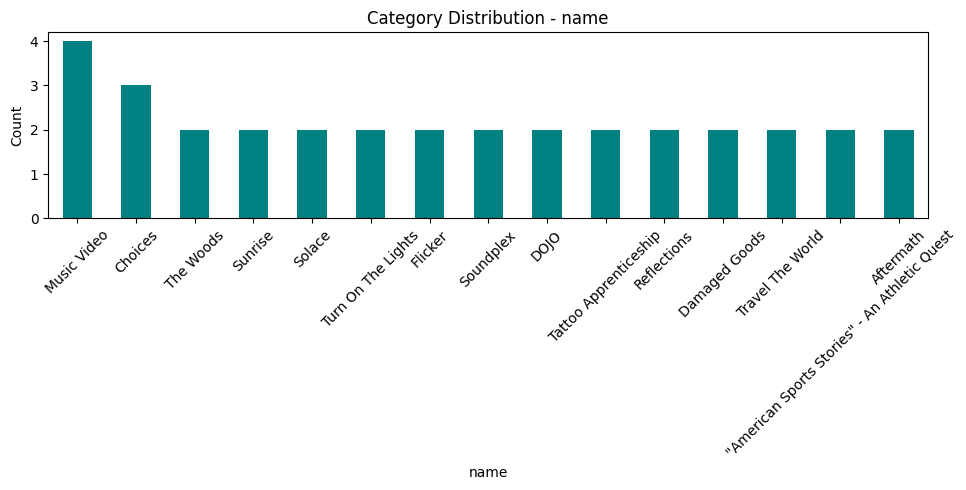

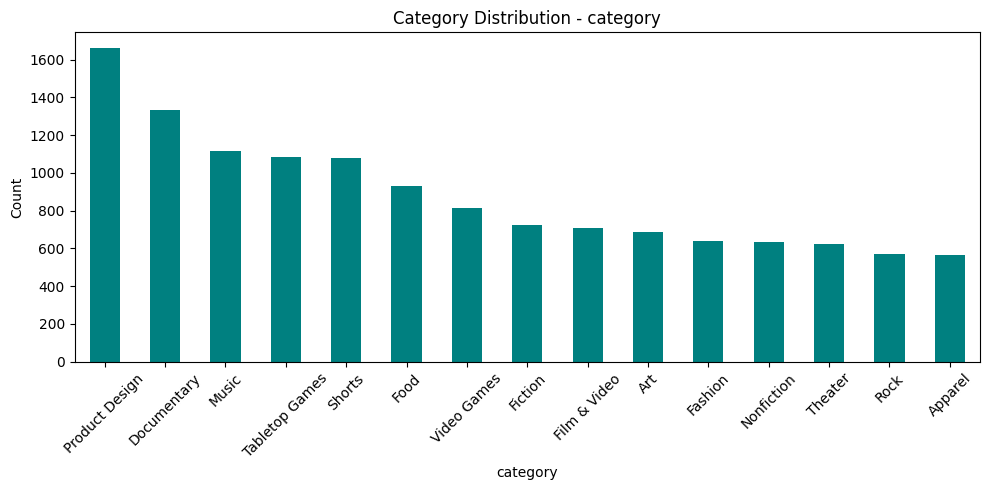

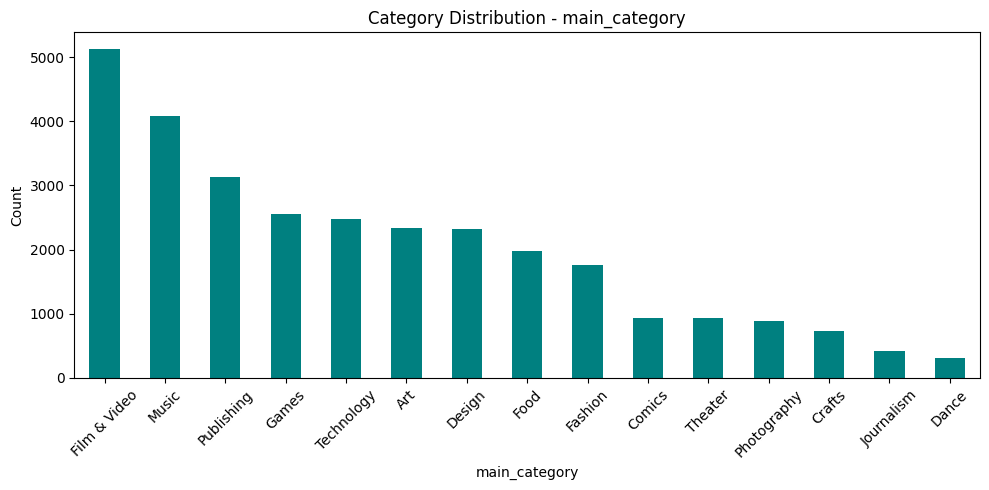

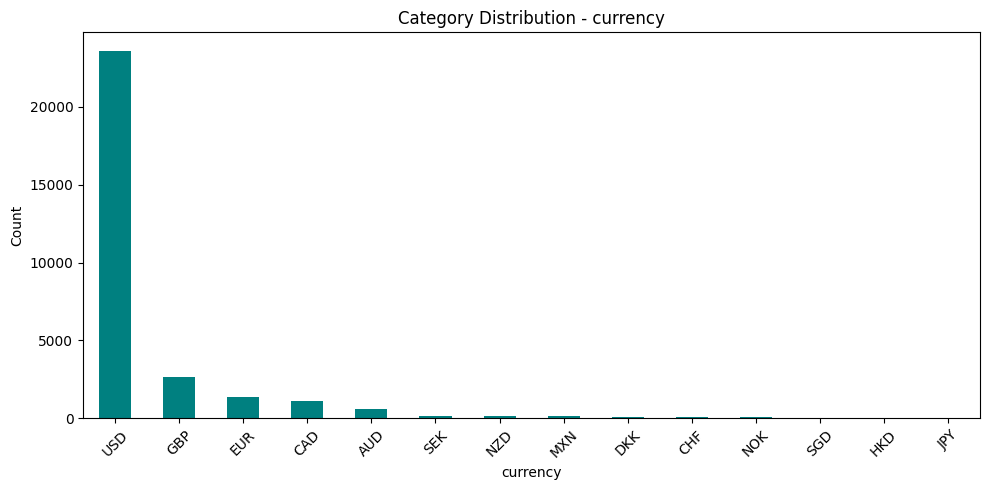

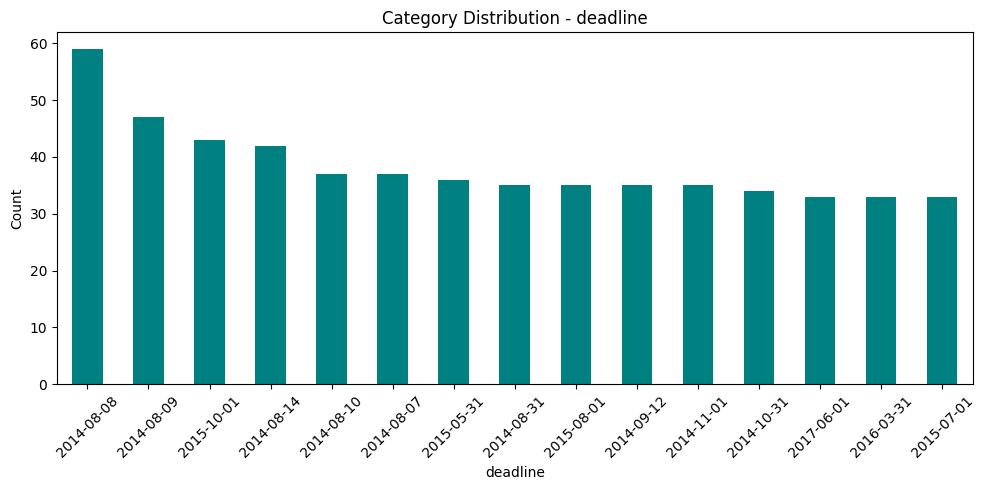

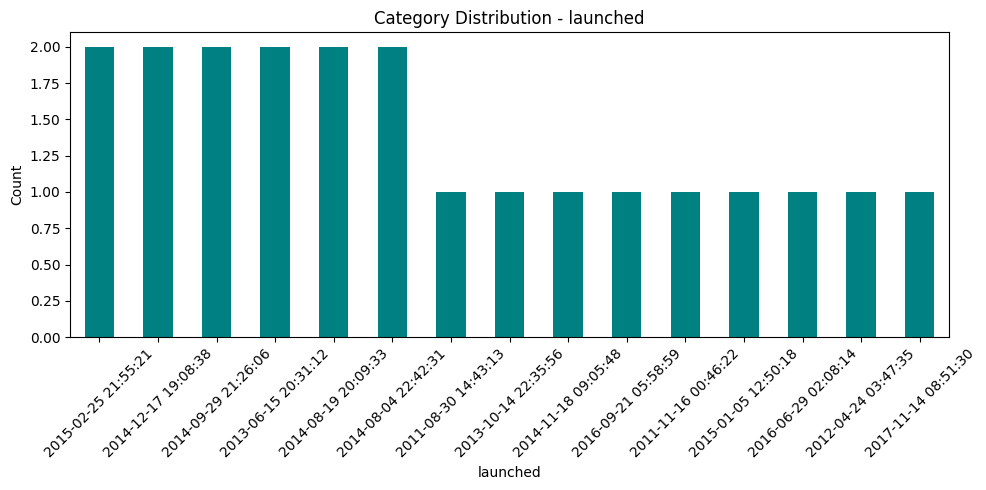

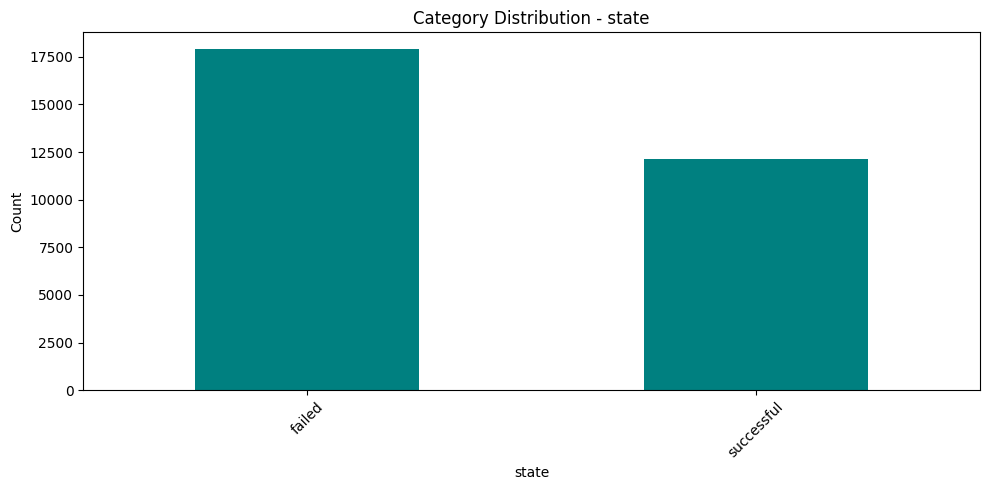

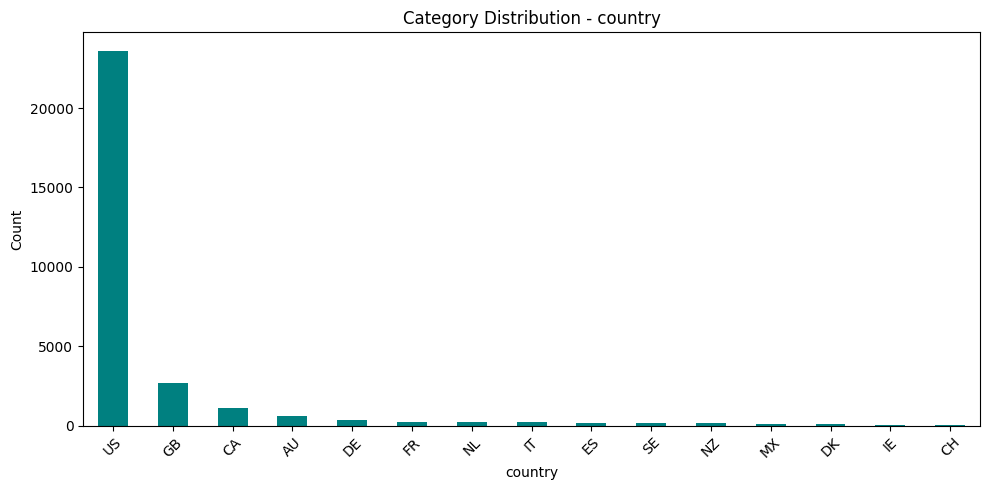

In [27]:
categorical_cols = df.select_dtypes(exclude=["int64", "float64"]).columns

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(15).plot(kind="bar", color="teal")
    plt.title(f"Category Distribution - {col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
print(2+2)